<a href="https://colab.research.google.com/github/Sourav61/Goeduhub-Assignments/blob/main/Task_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Author: <a href = "https://github.com/Sourav61">Sourav Pahwa</a>
<br>ID: GO_STP_13420

<b>Build a spam filter using Python and the multinomial Naive Bayes algorithm. </b>

Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

To Download the Dataset <a href="https://drive.google.com/file/d/1wr_soCWCZEOOzM9mJxYoTm9kySmAZAM4/view">click here.</a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("spam.csv")
df['length'] = df['Message'].apply(lambda x: len(x))

In [4]:
df.head(10)

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [5]:
df.tail(10)

,Category,Message,length
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,96
5563,ham,Ard 6 like dat lor.,19
5564,ham,Why don't you wait 'til at least wednesday to ...,67
5565,ham,Huh y lei...,12
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
 2   length    5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [7]:
df.describe(include="all")

,Category,Message,length
count,5572,5572,5572.000000
unique,2,5157,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.368988
std,NaN,NaN,59.926946
min,NaN,NaN,2.000000
25%,NaN,NaN,35.750000
50%,NaN,NaN,61.000000
75%,NaN,NaN,122.000000


In [8]:
df.describe().style.background_gradient(cmap='PuBu_r', low=0, high=0, axis=0, subset=None, text_color_threshold=0.408, vmin=None, vmax=None)

,length
count,5572.000000
mean,80.368988
std,59.926946
min,2.000000
25%,35.750000
50%,61.000000
75%,122.000000
max,910.000000


In [9]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
Category,object,2,['ham' 'spam']
Message,object,5157,"['Go until jurong point, crazy.. Available onl..."
length,int64,276,[111 29 155 49 61 147 77 160 157 154 109 1...


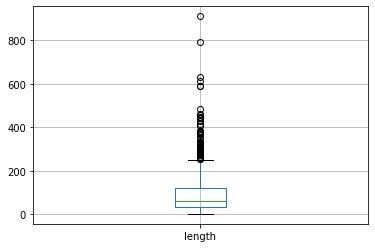

In [10]:
df.boxplot(column='length')
plt.show()

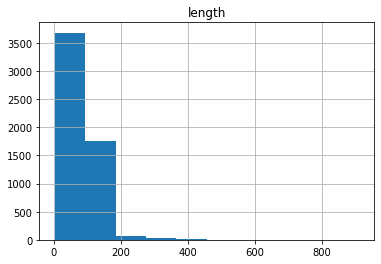

In [11]:
df.hist(column='length')
plt.show()

In [12]:
df.kurt()

length    17.272564
dtype: float64

In [13]:
df.skew()

length    2.506806
dtype: float64

In [14]:
df.keys()

Index(['Category', 'Message', 'length'], dtype='object')

In [15]:
df.columns

Index(['Category', 'Message', 'length'], dtype='object')

In [16]:
df.axes

[RangeIndex(start=0, stop=5572, step=1),
 Index(['Category', 'Message', 'length'], dtype='object')]

In [17]:
df.items

<bound method DataFrame.items of      Category                                            Message  length
0         ham  Go until jurong point, crazy.. Available only ...     111
1         ham                      Ok lar... Joking wif u oni...      29
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3         ham  U dun say so early hor... U c already then say...      49
4         ham  Nah I don't think he goes to usf, he lives aro...      61
...       ...                                                ...     ...
5567     spam  This is the 2nd time we have tried 2 contact u...     160
5568      ham               Will ü b going to esplanade fr home?      36
5569      ham  Pity, * was in mood for that. So...any other s...      57
5570      ham  The guy did some bitching but I acted like i'd...     125
5571      ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]>

In [18]:
df.ndim

2

In [19]:
df.dtypes

Category    object
Message     object
length       int64
dtype: object

In [20]:
df.duplicated().any()

True

In [21]:
df.duplicated().sum() 

415

In [22]:
df.isna()

,Category,Message,length
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5567,False,False,False
5568,False,False,False
5569,False,False,False
5570,False,False,False


In [23]:
df.isnull().any()

Category    False
Message     False
length      False
dtype: bool

In [24]:
df.isnull().sum()

Category    0
Message     0
length      0
dtype: int64

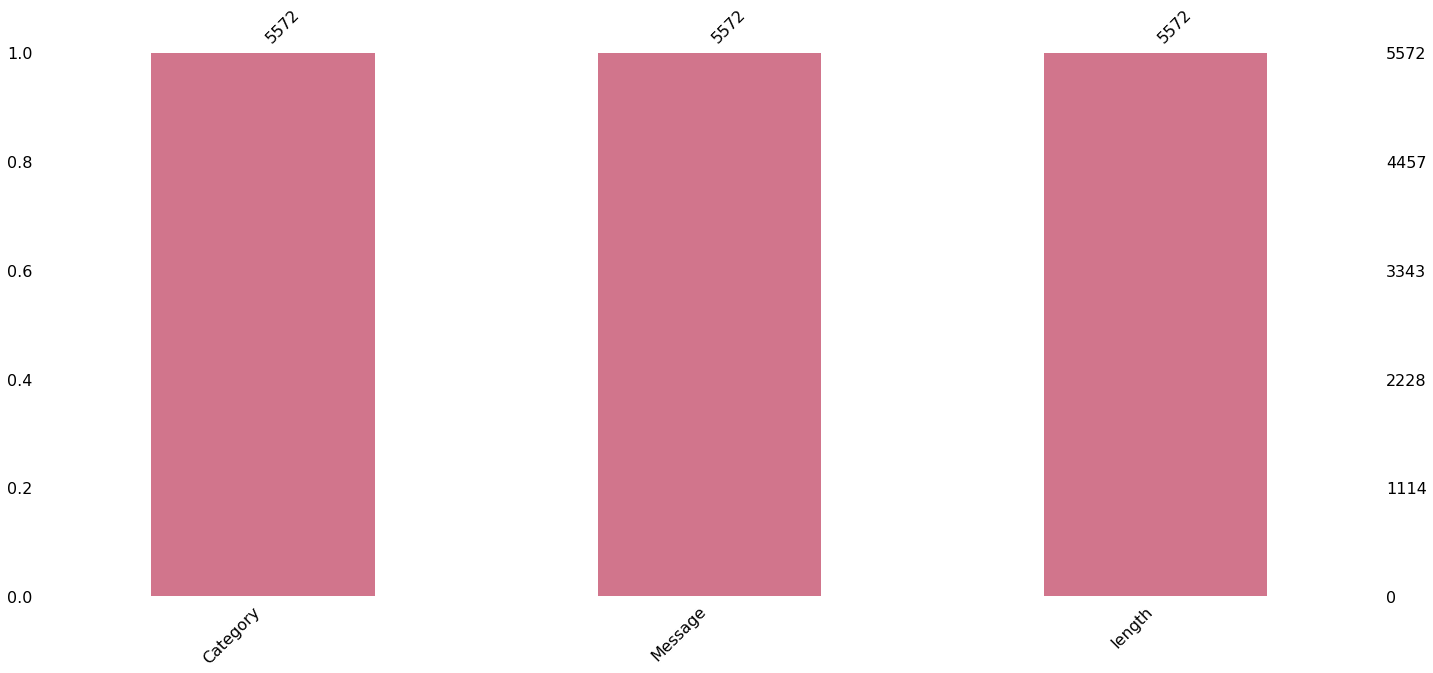

In [25]:
msno.bar(df.sample(5572),color=(0.8, 0.4, 0.5, 0.9))
plt.show()

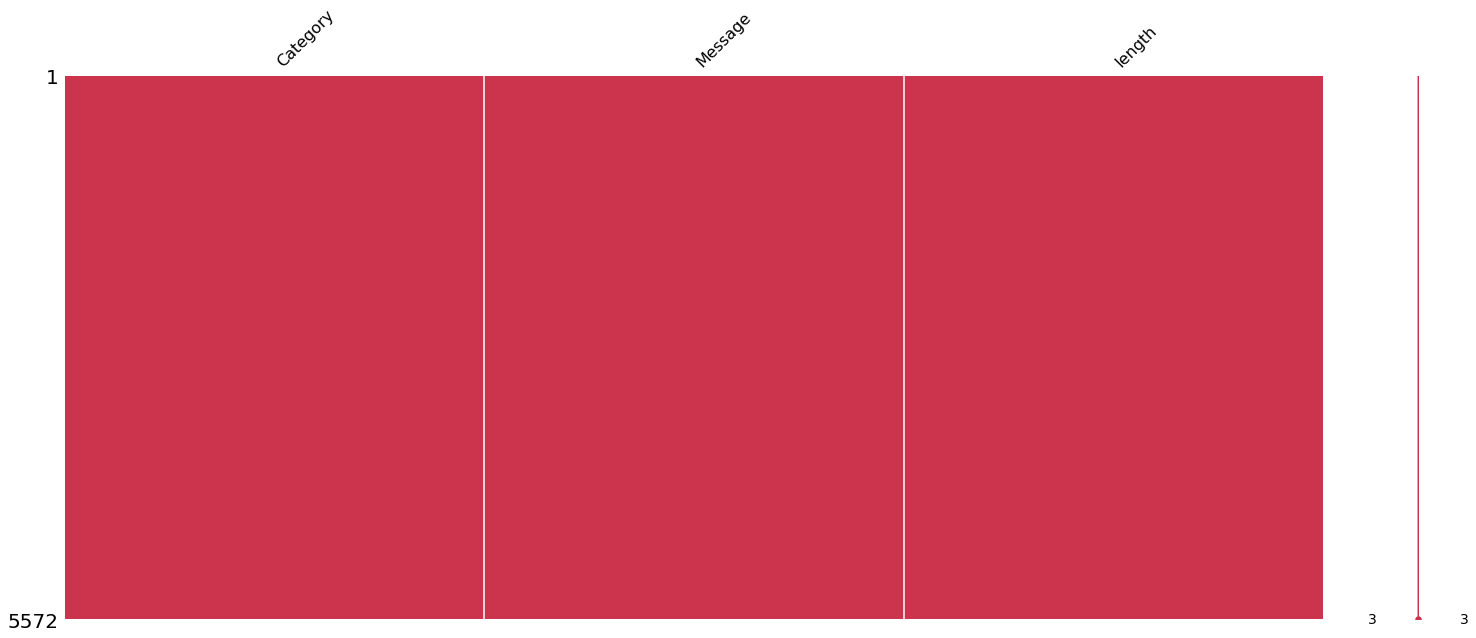

In [26]:
msno.matrix(df.sample(5572),color=(0.8, 0.2, 0.3))
plt.show()

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Text(0.5, 0, 'Category')

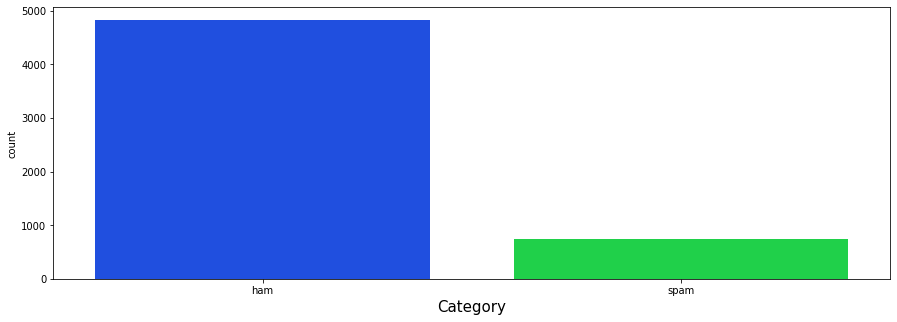

In [28]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-bright')

sns.countplot(df['Category'])
plt.xlabel('Category', fontsize = 15)

Text(0.5, 0.98, 'Email Distribution')

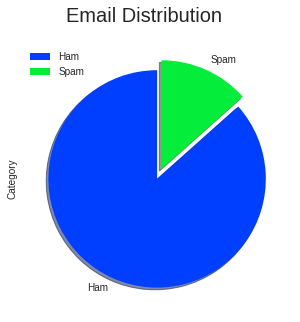

In [29]:
plt.style.use('seaborn-white')

df['Category'].value_counts().plot(kind = 'pie', explode = [0, 0.1], startangle = 90,
                                        labels=['Ham','Spam'],shadow = True, pctdistance = 0.5)
plt.legend()

plt.suptitle('Email Distribution', fontsize = 20)

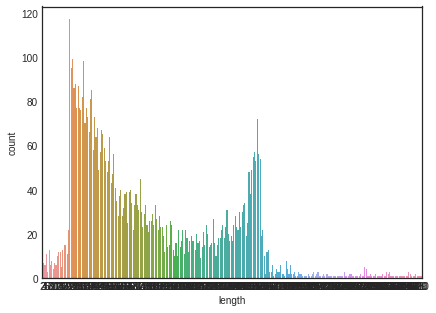

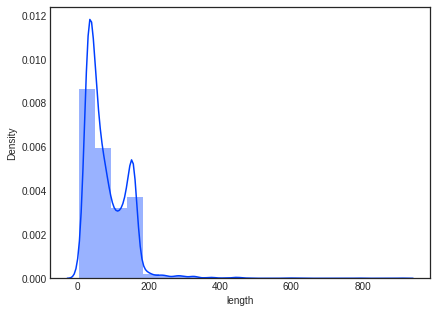

In [30]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-white')

plt.subplot(1, 2, 1)
sns.countplot(df['length'])
plt.show()

plt.xlabel('length', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(df["length"], bins = 20)
plt.show()

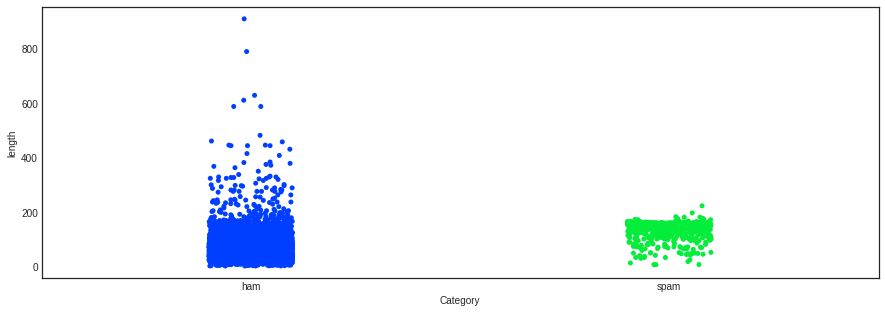

In [31]:
sns.stripplot(x='Category', y='length', data=df)
plt.show()

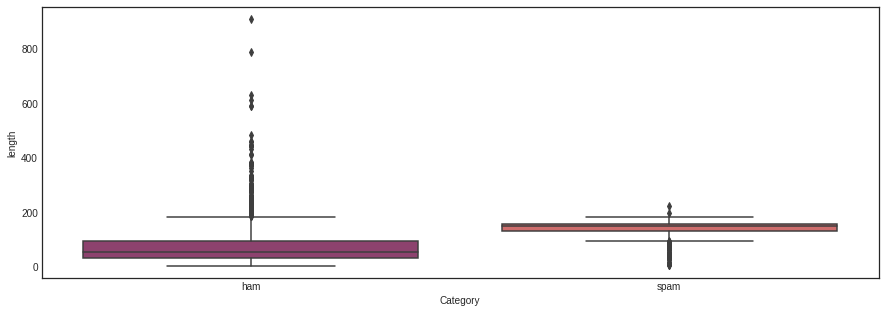

In [32]:
sns.boxplot(x='Category', y='length', data = df, palette = 'flare_r')
plt.show()

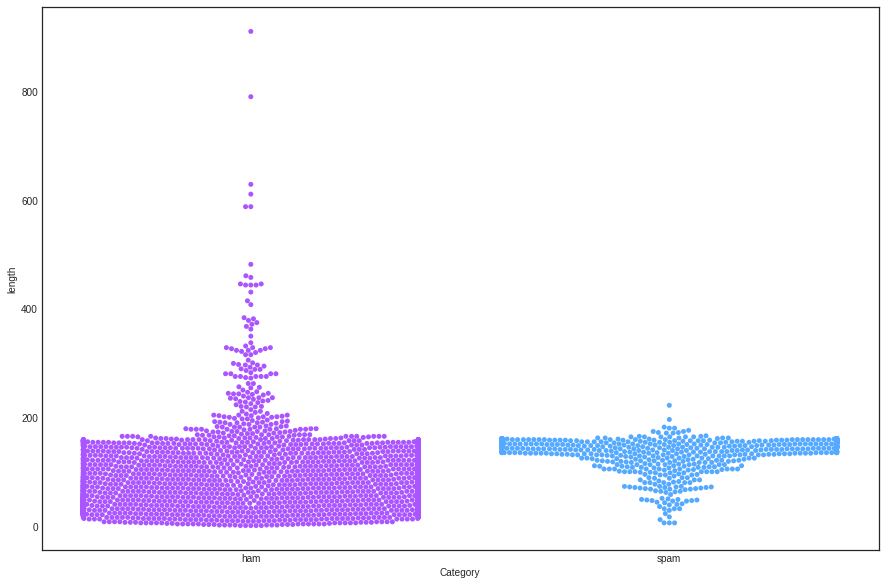

In [33]:
plt.figure(figsize=(15,10))
sns.swarmplot(x = "Category", y = "length", data = df, palette = 'cool_r')
plt.show()

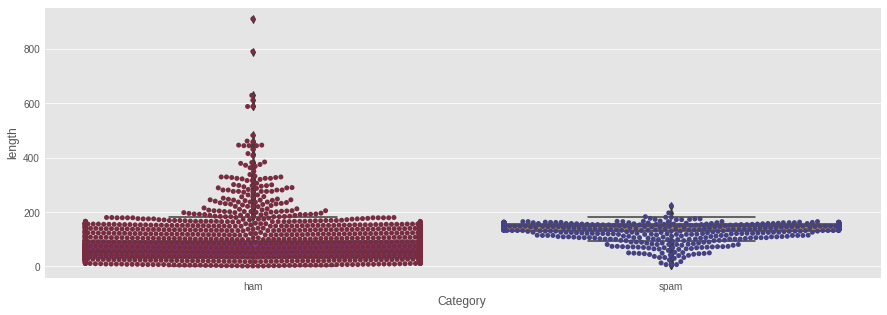

In [34]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

sns.boxplot(x='Category', y='length', data = df, palette = 'CMRmap')
sns.swarmplot(x='Category', y='length', data = df, palette = 'icefire_r')
plt.show()

In [35]:
fig = px.histogram(df, 
                   x='length', 
                   marginal='box',
                   color='Category',
                   nbins=47, 
                   title='Length of Messages')
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(df, 
                   x='Message', 
                   marginal='box',
                   color='Category',
                   nbins=5157, 
                   title='Length of Messages')
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
fig = px.scatter(df,
                 y='length',  
                 x='Message', 
                 color='Category', 
                 opacity=0.7, 
                 hover_data=['Category'], 
                 title='Message vs length')
fig.update_traces(marker_size=5)
fig.show()

In [38]:
px.histogram(df, x='length', color='Category', title='Spam Or Not')

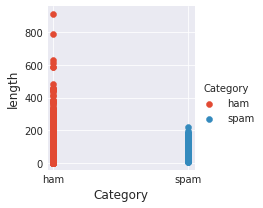

In [39]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Category").map(plt.scatter, "Category","length").add_legend()
plt.show()

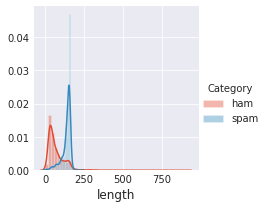

In [40]:
plt.close()
sns.FacetGrid(df, hue="Category").map(sns.distplot,"length").add_legend()
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
label_enc =LabelEncoder()

In [42]:
df.Category =label_enc.fit_transform(df.Category)

In [43]:
label_enc.classes_

array(['ham', 'spam'], dtype=object)

In [44]:
df.head(10)

,Category,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,147
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,157
9,1,Had your mobile 11 months or more? U R entitle...,154


In [45]:
df.tail(10)

,Category,Message,length
5562,0,Ok lor... Sony ericsson salesman... I ask shuh...,96
5563,0,Ard 6 like dat lor.,19
5564,0,Why don't you wait 'til at least wednesday to ...,67
5565,0,Huh y lei...,12
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125
5571,0,Rofl. Its true to its name,26


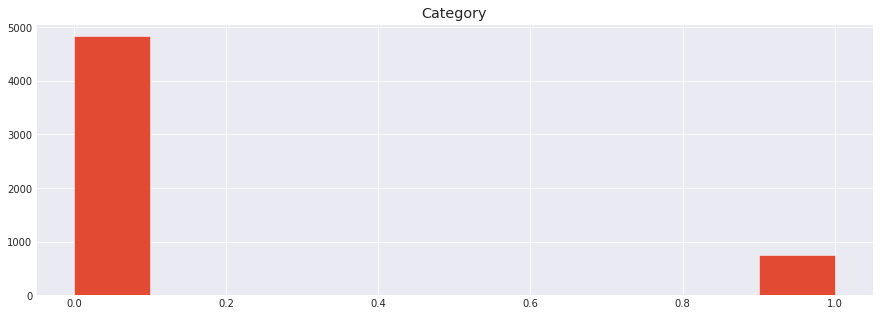

In [46]:
df.hist(column='Category')
plt.show()

In [47]:
df.corr()

,Category,length
Category,1.000000,0.378359
length,0.378359,1.000000


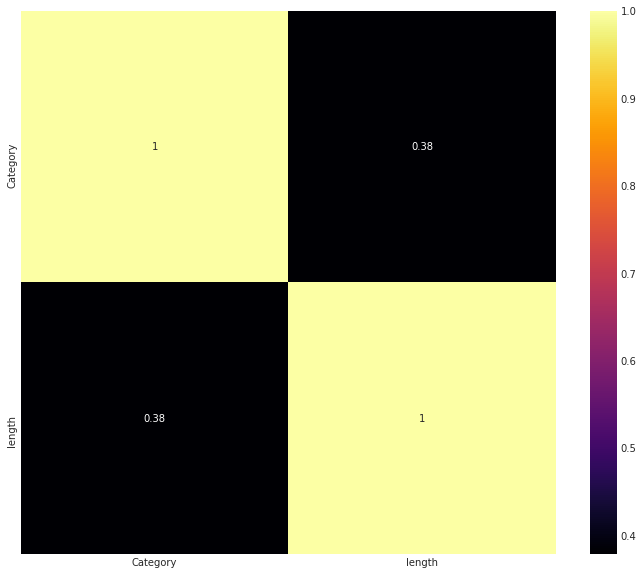

In [48]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='inferno', annot = True) 
plt.show()

,Category,length
Category,1.000000,0.378359
length,0.378359,1.000000


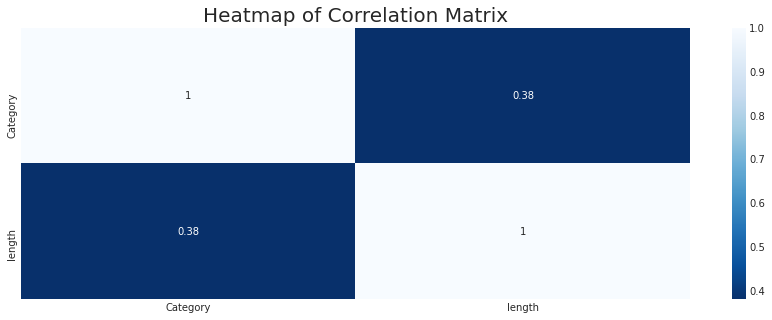

In [49]:
corr = df.corr()
sns.heatmap((corr),
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,cmap='Blues_r',annot=True,fmt=".2g")
plt.title('Heatmap of Correlation Matrix', fontsize=20)
corr

In [50]:
df.groupby('Category').mean()

,length
Category,
0,71.44829
1,137.98929


In [51]:
df.groupby('Category').var()

,length
Category,
0,3414.633364
1,898.817580


In [52]:
df.groupby('Category').std()

,length
Category,
0,58.434864
1,29.980287


In [53]:
df.groupby('Category').cov()

,,length
Category,,
0,length,3414.633364
1,length,898.817580


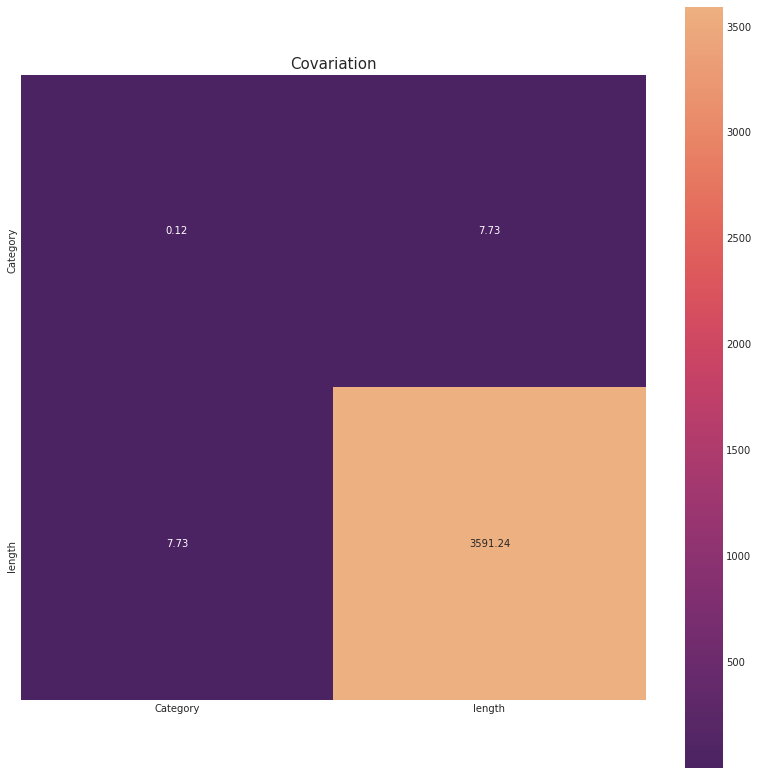

In [54]:
plt.figure(figsize=(14,14))
sns.heatmap(df.cov(), annot=True, fmt =".2f",square=True,cmap='flare_r')
plt.title("Covariation",fontsize = 15)
plt.show()

In [55]:
df.columns

Index(['Category', 'Message', 'length'], dtype='object')

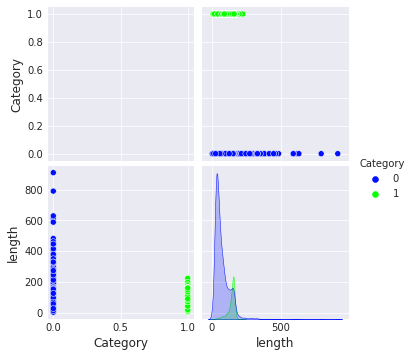

In [56]:
sns.pairplot(df,
             x_vars = ['Category', 'length'],
             y_vars = ['Category', 'length'],
       diag_kind='kde',hue='Category', palette="hsv_r"
             )
plt.show()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer('english')
X = df['Message']
x = tfidf.fit_transform(X)
y = df['Category']

In [62]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state =9)

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

x_train = tfidf_transformer.fit_transform(xtrain)

x_train.shape

(4457, 8709)

In [64]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=0.03)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [66]:
clf.fit(xtrain,ytrain)

MultinomialNB(alpha=0.03, class_prior=None, fit_prior=True)

In [69]:
pred=clf.predict(xtest)

In [70]:
print("Accuracy Score :",accuracy_score(ytest,pred),'\n')
print("Recall Score",recall_score(ytest,pred),'\n')
print("Precision Score :",precision_score(ytest,pred),'\n')
print("F1 Score :",f1_score(ytest,pred),'\n')

Accuracy Score : 0.9856502242152466 

Recall Score 0.9545454545454546 

Precision Score : 0.9423076923076923 

F1 Score : 0.9483870967741935 



In [71]:
cm = confusion_matrix(ytest, pred)

print(cm,"\n")

print(classification_report(ytest, pred))

[[952   9]
 [  7 147]] 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       961
           1       0.94      0.95      0.95       154

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

